In [43]:
import pandas as pd
energy_df=pd.read_csv('datos.csv', sep=';', usecols=['datetime','name','value'])
energy_df      

,name,value,datetime
0,Demanda programada P48 total,20058.667,2023-01-01T00:00:00+01:00
1,Demanda programada P48 total,19237.725,2023-01-01T01:00:00+01:00
2,Demanda programada P48 total,18147.283,2023-01-01T02:00:00+01:00
3,Demanda programada P48 total,17038.350,2023-01-01T03:00:00+01:00
4,Demanda programada P48 total,16463.475,2023-01-01T04:00:00+01:00
...,...,...,...
47392,Generación medida Turbinación bombeo,477.756,2023-03-31T19:00:00+02:00
47393,Generación medida Turbinación bombeo,1435.662,2023-03-31T20:00:00+02:00
47394,Generación medida Turbinación bombeo,2179.952,2023-03-31T21:00:00+02:00
47395,Generación medida Turbinación bombeo,1957.031,2023-03-31T22:00:00+02:00


In [44]:
demand_removed_df=energy_df[energy_df['name'].str.startswith('Demanda programada')==False]
demand_removed_df


,name,value,datetime
19883,Generación medida Biogás,83.937,2023-01-01T00:00:00+01:00
19884,Generación medida Biogás,81.609,2023-01-01T01:00:00+01:00
19885,Generación medida Biogás,80.939,2023-01-01T02:00:00+01:00
19886,Generación medida Biogás,80.873,2023-01-01T03:00:00+01:00
19887,Generación medida Biogás,80.765,2023-01-01T04:00:00+01:00
...,...,...,...
47392,Generación medida Turbinación bombeo,477.756,2023-03-31T19:00:00+02:00
47393,Generación medida Turbinación bombeo,1435.662,2023-03-31T20:00:00+02:00
47394,Generación medida Turbinación bombeo,2179.952,2023-03-31T21:00:00+02:00
47395,Generación medida Turbinación bombeo,1957.031,2023-03-31T22:00:00+02:00


In [45]:
#graph_df=demand_removed_df[demand_removed_df['datetime'].str.match('2023-01-01T')]
#graph_df=demand_removed_df.pivot(index='datetime', columns='name', values='value')
#graph_df=demand_removed_df[demand_removed_df['datetime'].str.match('2023-01-01T')].pivot(index='datetime', columns='name', values='value').sort_values('Demanda en consumo',ascending=False)
graph_df=demand_removed_df.pivot(index='datetime', columns='name', values='value').sort_values('Demanda en consumo',ascending=False)

graph_df=graph_df.reset_index()
graph_df

name,datetime,Demanda en consumo,Generación medida Biogás,Generación medida Biomasa,Generación medida Carbón,Generación medida Ciclo combinado,Generación medida Consumo bombeo,Generación medida Eólica,Generación medida Hidráulica,Generación medida Nuclear,Generación medida Solar fotovoltaica,Generación medida Solar térmica,Generación medida Turbinación bombeo,Generación medida cogeneración
0,2023-01-24T20:00:00+01:00,33213.892,85.919,400.676,597.938,8641.674,-1.210,8509.003,9413.467,7090.741,4.779,160.162,2095.585,2043.243
1,2023-01-25T20:00:00+01:00,33111.465,94.666,430.498,694.191,6637.599,-1.293,12300.534,8623.397,7078.478,4.475,147.058,1728.825,2049.521
2,2023-01-26T20:00:00+01:00,33097.904,96.596,391.176,563.003,5297.453,-1.426,14465.259,8565.803,7079.330,4.563,9.200,1569.053,1851.079
3,2023-01-30T20:00:00+01:00,33094.765,86.258,421.079,553.801,8660.353,-1.212,7968.083,8355.387,7084.174,3.692,213.335,1575.799,2347.821
4,2023-01-24T19:00:00+01:00,32984.913,87.119,396.026,643.645,8801.717,-1.239,8431.328,9059.928,7087.185,4.816,172.881,1968.826,2027.059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2023-01-02T03:00:00+01:00,13996.612,76.490,149.929,451.259,2455.359,-2861.218,8018.715,2993.769,6435.027,0.348,NaN,789.790,1028.060
2155,2023-01-01T07:00:00+01:00,13959.651,79.864,137.720,418.666,1770.100,-3623.503,4860.199,2570.356,6446.598,1.253,NaN,130.844,764.867
2156,2023-01-01T04:00:00+01:00,13792.577,80.765,149.777,418.885,2010.956,-4198.958,4505.066,2306.858,6448.298,0.396,NaN,95.909,777.888
2157,2023-01-01T06:00:00+01:00,13622.070,78.883,141.827,418.308,1853.609,-3988.477,4526.412,2252.164,6445.927,0.433,NaN,163.780,761.657


In [46]:
import plotly.express as px

demanda_df=graph_df['Demanda en consumo']
demanda_df


0       33213.892
1       33111.465
2       33097.904
3       33094.765
4       32984.913
          ...    
2154    13996.612
2155    13959.651
2156    13792.577
2157    13622.070
2158    13556.961
Name: Demanda en consumo, Length: 2159, dtype: float64

In [47]:
generacion_df=graph_df.drop(['Demanda en consumo', 'datetime'], axis=1)
generacion_df

name,Generación medida Biogás,Generación medida Biomasa,Generación medida Carbón,Generación medida Ciclo combinado,Generación medida Consumo bombeo,Generación medida Eólica,Generación medida Hidráulica,Generación medida Nuclear,Generación medida Solar fotovoltaica,Generación medida Solar térmica,Generación medida Turbinación bombeo,Generación medida cogeneración
0,85.919,400.676,597.938,8641.674,-1.210,8509.003,9413.467,7090.741,4.779,160.162,2095.585,2043.243
1,94.666,430.498,694.191,6637.599,-1.293,12300.534,8623.397,7078.478,4.475,147.058,1728.825,2049.521
2,96.596,391.176,563.003,5297.453,-1.426,14465.259,8565.803,7079.330,4.563,9.200,1569.053,1851.079
3,86.258,421.079,553.801,8660.353,-1.212,7968.083,8355.387,7084.174,3.692,213.335,1575.799,2347.821
4,87.119,396.026,643.645,8801.717,-1.239,8431.328,9059.928,7087.185,4.816,172.881,1968.826,2027.059
...,...,...,...,...,...,...,...,...,...,...,...,...
2154,76.490,149.929,451.259,2455.359,-2861.218,8018.715,2993.769,6435.027,0.348,NaN,789.790,1028.060
2155,79.864,137.720,418.666,1770.100,-3623.503,4860.199,2570.356,6446.598,1.253,NaN,130.844,764.867
2156,80.765,149.777,418.885,2010.956,-4198.958,4505.066,2306.858,6448.298,0.396,NaN,95.909,777.888
2157,78.883,141.827,418.308,1853.609,-3988.477,4526.412,2252.164,6445.927,0.433,NaN,163.780,761.657


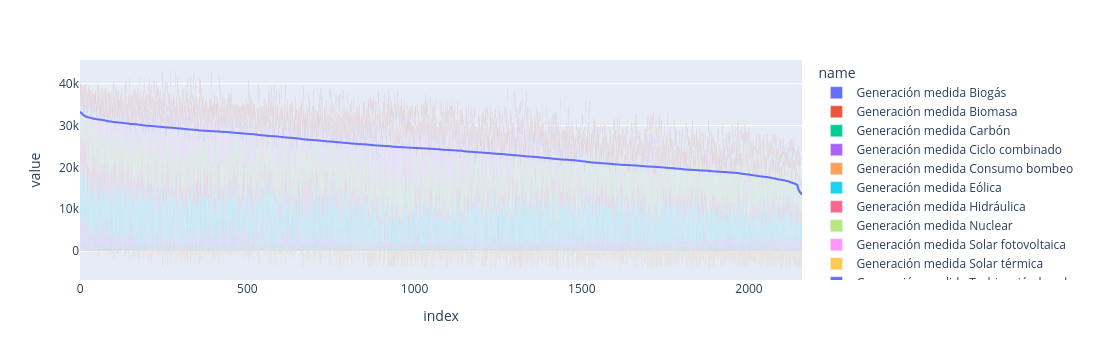

In [48]:
fig=px.bar(generacion_df)
fig.add_traces(list(px.line(demanda_df).select_traces()))
fig.show()